## Sentiment Analysis using IG Sentiment Data

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'


In [161]:
df = pd.read_excel('EURUSD_Sentiment.xlsx')

In [162]:
df.head()

,Date,EpicCode,CloseLong,CloseShort,OpenLong,OpenShort,HighLong,HighShort,LowLong,LowShort
0,2019-12-31,CS.D.EURUSD.TODAY.IP,38,62,38,62,38,62,38,62
1,2020-01-01,CS.D.EURUSD.TODAY.IP,38,62,38,62,38,62,38,62
2,2020-01-02,CS.D.EURUSD.TODAY.IP,41,59,39,61,41,63,37,59
3,2020-01-03,CS.D.EURUSD.TODAY.IP,44,56,41,59,46,60,40,54
4,2020-01-05,CS.D.EURUSD.TODAY.IP,45,55,44,56,45,56,44,55


In [163]:
print("Range of Date: {} to {}".format(df["Date"][0], df["Date"][df.shape[0]-1]))

Range of Date: 2019-12-31 00:00:00 to 2020-12-31 00:00:00


In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CloseLong,315.0,44.314286,12.727908,25.0,35.0,41.0,51.0,80.0
CloseShort,315.0,55.685714,12.727908,20.0,49.0,59.0,65.0,75.0
OpenLong,315.0,44.307937,12.700009,25.0,35.0,41.0,50.5,80.0
OpenShort,315.0,55.692063,12.700009,20.0,49.5,59.0,65.0,75.0
HighLong,315.0,46.679365,12.489310,26.0,37.5,43.0,55.5,80.0
HighShort,315.0,58.301587,12.244894,22.0,52.0,62.0,67.0,75.0
LowLong,315.0,41.698413,12.244894,25.0,33.0,38.0,48.0,78.0
LowShort,315.0,53.320635,12.489310,20.0,44.5,57.0,62.5,74.0


In [165]:
features = ["Date", "CloseLong", "CloseShort", "OpenLong", "OpenShort"]
df = df[features]

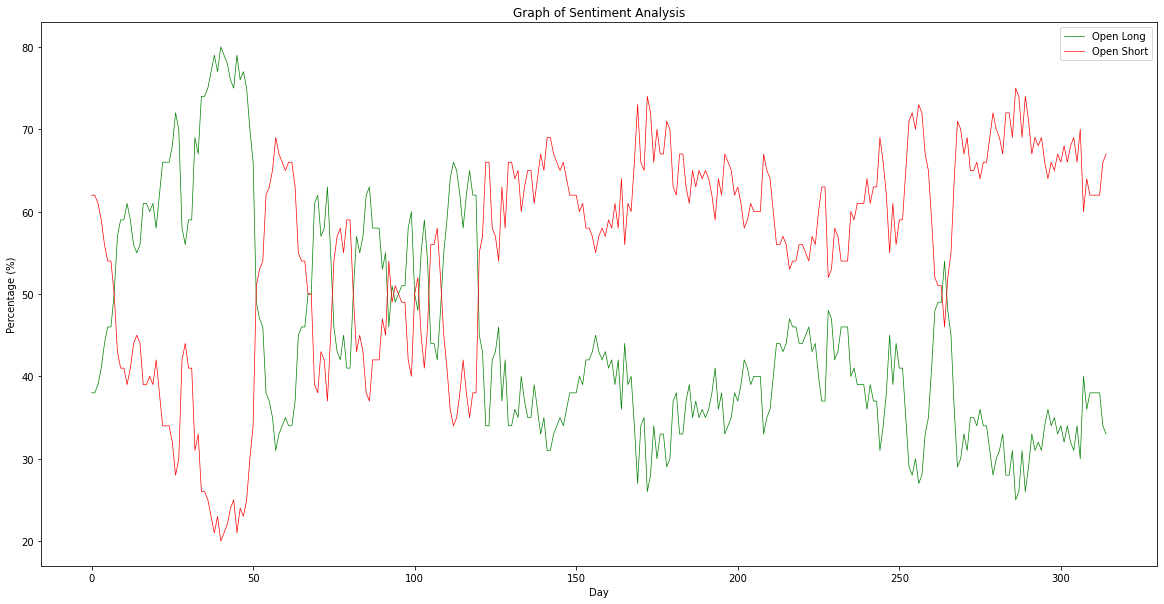

In [166]:
plt.figure(figsize=(20,10))

df["OpenLong"].plot(label = "Open Long", linewidth = 0.7, color = 'g')
df["OpenShort"].plot(label = "Open Short", linewidth = 0.7, color = 'r')
plt.xlabel("Day")
plt.ylabel("Percentage (%)")
plt.title("Graph of Sentiment Analysis")
plt.legend()

As the Sentiment Data also includes Data on Sundays and the EUR/USD Price only contains price data on weekdays, we want to remove the sundays from the Sentiment data.

In [167]:
df['Date'] = pd.to_datetime(df['Date'])

In [168]:
df['Date'].dt.dayofweek

0      1
1      2
2      3
3      4
4      6
      ..
310    6
311    0
312    1
313    2
314    3
Name: Date, Length: 315, dtype: int64

In [169]:
df = df.loc[df['Date'].dt.dayofweek <= 4]
df = df.reset_index(drop=True)

In [170]:
df

,Date,CloseLong,CloseShort,OpenLong,OpenShort
0,2019-12-31,38,62,38,62
1,2020-01-01,38,62,38,62
2,2020-01-02,41,59,39,61
3,2020-01-03,44,56,41,59
4,2020-01-06,46,54,46,54
...,...,...,...,...,...
258,2020-12-25,38,62,38,62
259,2020-12-28,38,62,38,62
260,2020-12-29,33,67,38,62
261,2020-12-30,33,67,34,66


### Get Daily EUR/USD Data

In [171]:
df_histo = pd.read_csv('EURUSD_HistoricalData.csv')
df_histo = df_histo.loc[::-1].reset_index(drop=True)

In [172]:
df_histo

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2019,1.1210,1.1198,1.1240,1.1198,43.32K,0.12%
1,01/01/2020,1.1210,1.1213,1.1223,1.1205,0.78K,0.00%
2,01/02/2020,1.1170,1.1212,1.1227,1.1163,43.89K,-0.36%
3,01/03/2020,1.1158,1.1172,1.1181,1.1125,56.62K,-0.11%
4,01/06/2020,1.1193,1.1168,1.1207,1.1155,58.88K,0.31%
...,...,...,...,...,...,...,...
258,12/25/2020,1.2204,1.2186,1.2212,1.2165,14.42K,0.15%
259,12/28/2020,1.2214,1.2202,1.2251,1.2181,77.76K,0.08%
260,12/29/2020,1.2247,1.2217,1.2276,1.2207,98.53K,0.27%
261,12/30/2020,1.2295,1.2248,1.2311,1.2246,104.54K,0.39%


In [173]:
df_histo.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2019,1.1210,1.1198,1.1240,1.1198,43.32K,0.12%
1,01/01/2020,1.1210,1.1213,1.1223,1.1205,0.78K,0.00%
2,01/02/2020,1.1170,1.1212,1.1227,1.1163,43.89K,-0.36%
3,01/03/2020,1.1158,1.1172,1.1181,1.1125,56.62K,-0.11%
4,01/06/2020,1.1193,1.1168,1.1207,1.1155,58.88K,0.31%


In [174]:
df_histo.describe()

,Price,Open,High,Low
count,263.000000,263.000000,263.000000,263.000000
mean,1.141663,1.141412,1.145999,1.137402
std,0.044480,0.044226,0.044125,0.044564
min,1.069000,1.069100,1.081200,1.063700
25%,1.101250,1.100750,1.104300,1.095400
50%,1.130600,1.130000,1.136500,1.126200
75%,1.181400,1.181450,1.185300,1.178050
max,1.229500,1.229800,1.231100,1.224600


In [175]:
df_histo = df_histo.rename(columns = {"Change %": 'Change'})

In [176]:
features_hist = ['Change']

In [177]:
df_hist = df_histo[features_hist]
df_hist.loc[20]

Change    0.04%
Name: 20, dtype: object

In [178]:
df_hist['Change'] = df_hist['Change'].str.rstrip("%").astype(float)/100

In [179]:
df_hist

,Change
0,0.0012
1,0.0000
2,-0.0036
3,-0.0011
4,0.0031
...,...
258,0.0015
259,0.0008
260,0.0027
261,0.0039


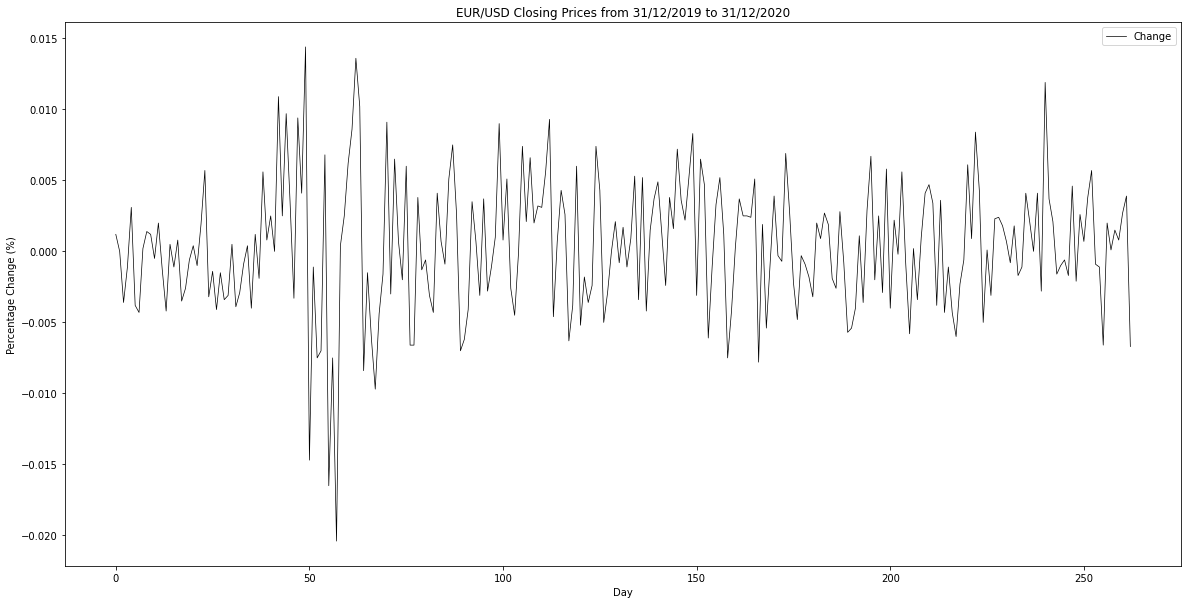

In [180]:
plt.figure(figsize=(20,10))

df_hist["Change"].plot(label = "Change", linewidth = 0.7, color = 'black')
plt.xlabel("Day")
plt.ylabel("Percentage Change (%)")
plt.title("EUR/USD Closing Prices from 31/12/2019 to 31/12/2020")
plt.legend()

#### Let's now examine the relationship between the price and the Sentiment. Our hypothesis is, if there is a strong tendency in the sentiment the price will most likely move in the opposite direction. Let's first calculate the correlation index between the Long Open Price and the Percentage change in price.

In [181]:
test1 = df['OpenLong'].copy()
test2 = df_hist['Change'].copy()


In [182]:
# Normalize the data
test1 = (test1-test1.mean())/test1.std()
test2 = (test2-test2.mean())/test2.std()


In [183]:
test1.corr(test2)

-0.0020566241149380816

This suggests that these features may not be correlated after all. However, let's further examine potential relationships.

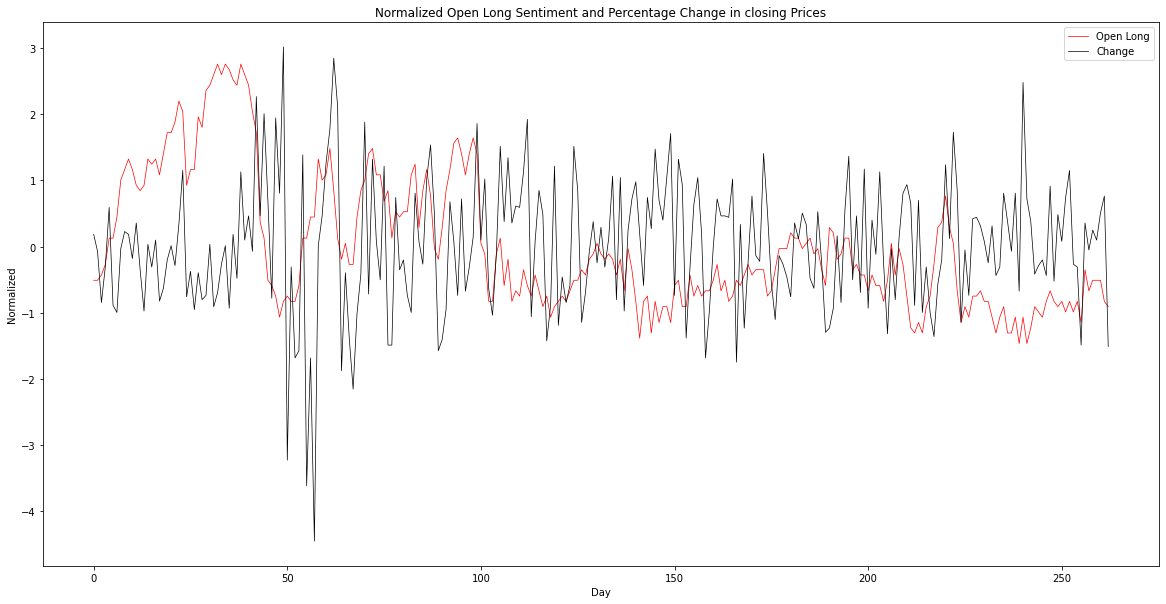

In [184]:
plt.figure(figsize=(20,10))

test1.plot(label = "Open Long", linewidth = 0.7, color = 'red')
test2.plot(label = "Change", linewidth = 0.7, color = 'black')

plt.xlabel("Day")
plt.ylabel("Normalized")
plt.title("Normalized Open Long Sentiment and Percentage Change in closing Prices")
plt.legend()

Instead of plotting the Sentiment Data, we can calculate the percentage change as well for the sentiment.

In [185]:
pct_change_df = df['OpenLong'].pct_change(fill_method = 'ffill')

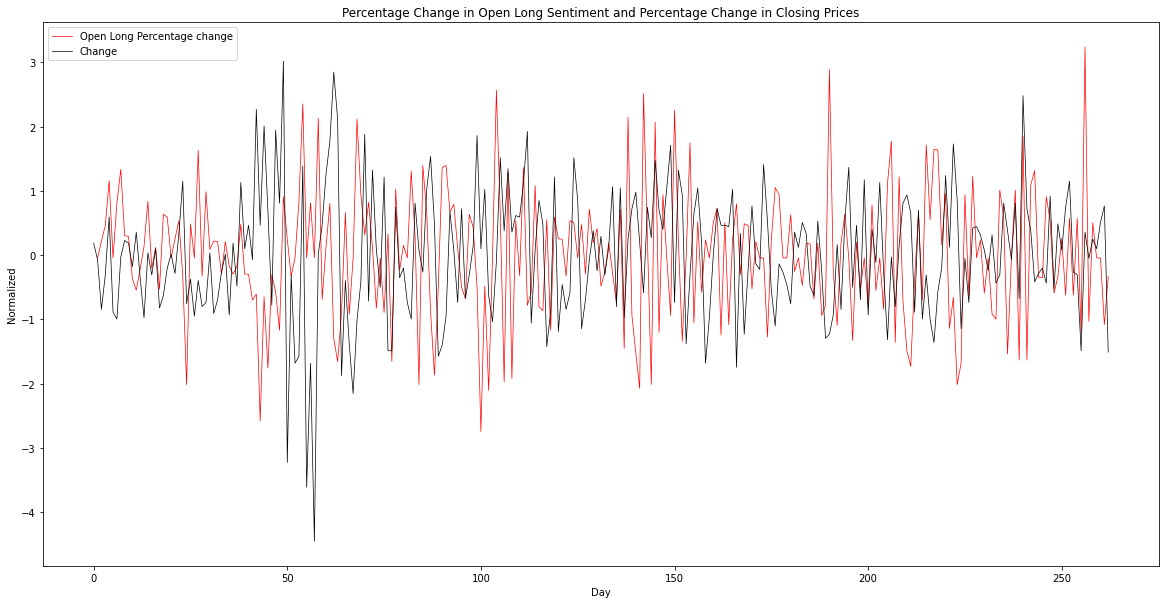

In [186]:
plt.figure(figsize=(20,10))

test3 = (pct_change_df-pct_change_df.mean())/pct_change_df.std()
test4 = (df_hist['Change']-df_hist['Change'].mean())/df_hist['Change'].std()

test3.plot(label = "Open Long Percentage change", linewidth = 0.7, color = 'red')
test4.plot(label = "Change", linewidth = 0.7, color = 'black')

plt.xlabel("Day")
plt.ylabel("Normalized")
plt.title("Percentage Change in Open Long Sentiment and Percentage Change in Closing Prices")
plt.legend()

In [187]:
test3.corr(test4)

-0.06659356492030427

### Instead of using the correlation index, let's try to use other methods to measure their relationship.

For this we can examine the case, where the sentiment is strongly leaning towards long/short orders. Therefore, we have to first define 

In [229]:
strong_sentiment = 75

In [230]:
sentiment_strong = df['OpenLong'].loc[(df['OpenLong'] >= strong_sentiment) | (df['OpenLong'] <= 100-strong_sentiment)]

In [231]:
Price_strong = df_histo.loc[sentiment_strong.index]['Change'].str.rstrip("%").astype(float)/100


In [232]:
sentiment_strong_bin = np.where(sentiment_strong <= 100 - strong_sentiment, 1, 0)
Price_strong_bin = np.where(Price_strong >= 0, 1, 0)

In [233]:
sentiment_strong_bin


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [234]:
Price_strong_bin

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [246]:
print("Percentage of Price increases given Long sentiment is below {} is {:.2f}".format(100-strong_sentiment,(np.sum(Price_strong_bin == sentiment_strong_bin)/ Price_strong_bin.shape)[0]))

Percentage of Price increases given Long sentiment is below 25 is 0.45
